# <center> 👉 PT_08_2 IP » _2D Histogram, Back projection and FFT_ </center>

https://bkshin.tistory.com/entry/OpenCV-4/  
https://github.com/BaekKyunShin/OpenCV_Project_Python/tree/master/02.interface  

## ▶ 2D Histogram  

Histogram is a one-dimensional result of analyzing the pixel intensity of a grayscale image, that is, the intensity of light.
- A one-dimensional histogram expresses how many pixels there are in an image.  

__2D Histogrm is a method of simultaneously analyzing Hue & Saturation of a color image.__  
- so, input image needs to be converted to HSV Format
- A two-dimensional histogram has two axes and expresses the number of points where each axis meets.
- Useful in Histogram Back-Projection  

        Histogram은 1차원으로 grayscale 이미지의 pixel의 강도, 즉 빛의 세기를 분석한 결과였습니다. 
        - 1차원 히스토그램은 이미지 안에 픽셀이 각각 몇 개인지를 표현합니다.
        2D Histogrm은 Color 이미지의 Hue(색상) & Saturation(채도)을 동시에 분석하는 방법
        - 대상 이미지를 HSV Format로 변환해야 함
        - 2차원 히스토그램은 축이 2개이고, 각 축이 만나는 지점의 개수를 표현합니다. 
        - Histogram Back-Projection에서 유용하게 사용  
        
~ Syntax:  
    
* **calcHist([image, ][channel, ]mask[, bins][, range])**

~ Parameters:  
- image – HSV img
- channel – 0-> Hue, 1-> Saturation
- bins – [180,256] Hue, Saturation
- range – [0,180,0,256] : Hue(0~180), Saturation(0,256)
    
~ Example: 

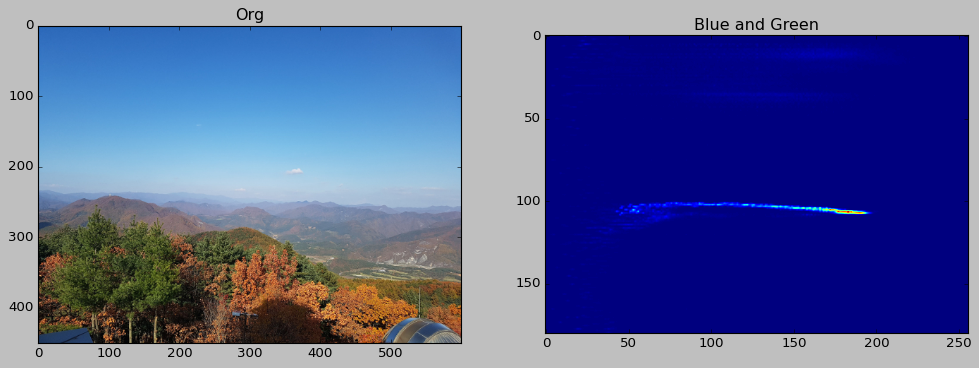

In [20]:
# 2D histo (histo_2d.py)

import cv2
import matplotlib.pylab as plt
from matplotlib.pyplot import figure

# plt.style.use('classic')            
img = cv2.imread('./images/practice_img/mountain.jpg')
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

figure(figsize=(15, 5), dpi=80)
plt.subplot(131)
hist = cv2.calcHist([hsv], [0,1], None, [180,256],[0,180,0,256]) # Blue and Green
                                                 
cv2.imshow('Hist',hist)
cv2.waitKey()
cv2.destroyAllWindows()

# p = plt.imshow(hist)                                            
plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Org')                                     
plt.subplot(122), plt.imshow(hist), plt.title('Blue and Green') # plt.colorbar(p)
plt.show()

The X-axis represents Saturation and the Y-axis represents Hue values.
- If you look at the Y axis, you can see that the values are clustered around 100. In the HSV model, if H is 100, it is light blue.
- In other words, you can see through the 2D Histogram that this image has a lot of sky blue.  

        X축은 Saturation, Y축은 Hue값을 나타냅니다.   
        - Y축을 보면 100근처에 값이 모여 있는 것을 알 수 있습니다. HSV모델에서 H가 100이면 하늘색입니다.   
        - 즉 이 이미지는 하늘색이 많이 분포되어 있다는 것을 2D Histogram을 통해서 알 수 있습니다.

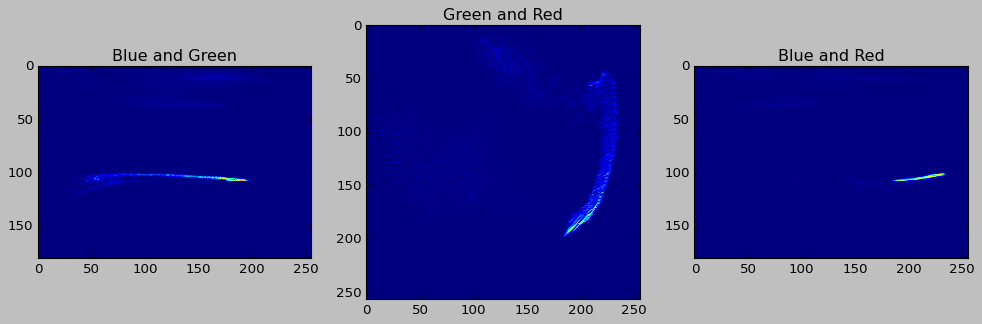

In [26]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./images/practice_img/mountain.jpg')
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

figure(figsize=(15, 5), dpi=80)

plt.subplot(131)
hist = cv2.calcHist([hsv], [0,1], None, [180,256], [0,180,0,256]) # Blue and Green
plt.imshow(hist)
plt.title('Blue and Green')

plt.subplot(132)
hist = cv2.calcHist([hsv], [1,2], None, [256,256], [0,256,0,256]) # Green and Red
plt.imshow(hist)
plt.title('Green and Red')

plt.subplot(133)
hist = cv2.calcHist([hsv], [0,2], None, [180,256], [0,180,0,256]) # Blue and Red
plt.imshow(hist)
plt.title('Blue and Red')

plt.show()

## ▶ Back Projection  (역투영)

Histogram Backporjection is used to __distinguish or find the object__ you are looking for in an image.
This is the process of taking the pixel value you are looking for and quantifying how distributed the pixel is in the current image. In other words, analyze the Histogram of the desired object,
This is a method of finding a target by checking how many analysis values there are in the entire image. 

Histogram Backporjection은 이미지에서 찾고자하는 대상을 구분하거나 찾는데 사용이 됩니다.   
- 찾고자 하는 pixel값을 가지고, 현재 이미지에서 그 pixel이 얼마나 분포가 되어 있는지 수치화 하는 과정입니다. 즉, 원하는 대상의 Histogram을 분석하고,   
- 전체 이미지에서 그 분석값이 얼마나 있는지 확인하여 대상을 찾는 방법입니다.


Let's take a look at the image below.     
- If you want to isolate only the grass within the image, specify the region of interest (ROI) corresponding to the grass and apply the back projection.     
- Then, the part that corresponds to the grass will be separated from each other by white and the part that is not grass by black.     
- However, since this method separates based on color, the performance will be reduced if there are other objects with a similar color to the grass.  

<img src = "./images/son/son1_box.jpg" align='left' width=300 height=300> <img src = "./BP_result_cv.jpg" width=300 height=300>

~ Example:

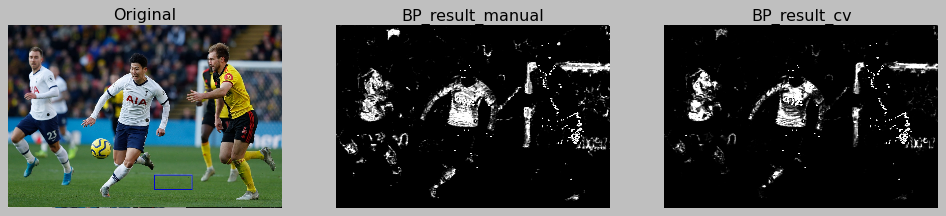

In [39]:
# Separating objects in a selected area with the mouse (histo_backproject.py)

import cv2
import numpy as np
import matplotlib.pyplot as plt

win_name = 'back_projection'
img = cv2.imread('./images/son/son1.jpg')
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
draw = img.copy()

def masking(bp, win_name):
    disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
    cv2.filter2D(bp,-1,disc,bp)
    _, mask = cv2.threshold(bp, 1, 255, cv2.THRESH_BINARY)
    result = cv2.bitwise_and(img, img, mask=mask)
    cv2.imshow(win_name, result)

def backProject_manual(hist_roi):
    hist_img = cv2.calcHist([hsv_img], [0,1], None,[180,256], [0,180,0,256]) 
    hist_rate = hist_roi/ (hist_img + 1) # Divide this histogram by the histogram of the entire image to get the ratio
    h,s,v = cv2.split(hsv_img) 
    bp = hist_rate[h.ravel(), s.ravel()] # the obtained ratio is mapped to the H and S pixel values of the original image.
    bp = np.minimum(bp, 1) 
    bp = bp.reshape(hsv_img.shape[:2])  
    cv2.normalize(bp,bp, 0, 255, cv2.NORM_MINMAX)
    bp = bp.astype(np.uint8)
    masking(bp,'result_manual') 
    cv2.imwrite('./results/BP_result_manual.jpg',bp) 
    
def backProject_cv(hist_roi):
    bp_cv = cv2.calcBackProject([hsv_img], [0, 1], hist_roi,  [0, 180, 0, 256], 1) 
    masking(bp_cv,'result_cv')  
    cv2.imwrite('./results/BP_result_cv.jpg',bp_cv)

(x,y,w,h) = cv2.selectROI(win_name, img, False) 
if w > 0 and h > 0:
    roi = draw[y:y+h, x:x+w]
    cv2.rectangle(draw, (x, y), (x+w, y+h), (0,0,255), 2) 
    hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV) 
    hist_roi = cv2.calcHist([hsv_roi],[0, 1], None, [180, 256], [0, 180, 0, 256]) 
    backProject_manual(hist_roi)
    backProject_cv(hist_roi)
    
cv2.imshow(win_name, draw)
cv2.waitKey()
cv2.destroyAllWindows()

img = cv2.imread('./images/son/son1_box.jpg')
img_bp = cv2.imread('./results/BP_result_manual.jpg')
img_cv = cv2.imread('./results/BP_result_cv.jpg')

fig, axs = plt.subplots(1,3,figsize=(15,5))
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), axs[0].axis('off'), axs[0].set_title('Original')
axs[1].imshow(cv2.cvtColor(img_bp, cv2.COLOR_BGR2RGB)), axs[1].axis('off'), axs[1].set_title('BP_result_manual')
axs[2].imshow(cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)), axs[2].axis('off'), axs[2].set_title('BP_result_cv')

plt.show()

### ▶ Example Code Explanation  

* **def backProject_manual(hist_roi):** 
>- This is a function that directly implements back projection.
>- The region of interest histogram was passed as a parameter.
>- Divide this histogram by the histogram of the entire image to get the ratio.
>>- The reason for adding 1 to the denominator at this time is to prevent the denominator from becoming 0.
>>- Calculating the ratio means that a histogram with a color distribution similar to the area of interest has a value close to 1,
>>- Otherwise, histograms have values close to 0, which means they are good for masking.
>- Then, the obtained ratio is mapped to the H and S pixel values of the original image.  

    >- 이는 역투영을 직접 구현한 함수입니다. 
    >- 파라미터로는 관심 영역 히스토그램이 전달되었습니다. 
    >- 이 히스토그램을 전체 이미지의 히스토그램으로 나누어 비율을 구합니다. 
    >>- 이때 분모에 1을 더하는 이유는 분모가 0이 되는 것을 막기 위해서입니다. 
    >>- 비율을 구한다는 것은 관심 영역과 비슷한 색상 분포를 갖는 히스토그램은 1에 가까운 값을 갖고, 
    >>- 그렇지 않은 히스토그램은 0에 가까운 값을 갖게 되므로 마스킹에 사용하기 좋다는 뜻입니다.   
    >- 그 다음 이렇게 구한 비율을 원래 이미지의 H, S 픽셀 값에 매핑합니다.
    >* **bp = hist_rate[h.ravel(), s.ravel()]:**   

>- **hist_rate:**  
>>- It has a histogram ratio as a value, and h and s are each pixel in the actual image.   
>>- Thus, we get a one-dimensional array with the ratio of the points where h and s intersect to their pixel values.   
>>- The value obtained in this way is a ratio, so it should not exceed 1. Therefore, any number above 1 is converted to 1.   
    
However, OpenCV provides all of this with the following functions:
- **cv2.calcBackProject(img, channel, hist, ranges, scale)**  
    - scale: Scale factor to apply to the results 결과에 적용할 배율 계수  
- **masking():** 스레시홀딩과 마스킹을 활용하여 결과를 출력하는 기능을 합니다.   
- **cv2.getStructuringElement() and cv2.filter2D():**     
>- Role in smoothing the surface of the mask 마스크의 표면을 부드럽게 해주는 역할  

👉 Pros and cons of back projection

* Back projection has the advantage of being able to separate objects of complex shapes without the need for something like an alpha channel or chroma key.    
* However, because back projection extracts objects that are similar to the color of the region of interest based on the histogram, 
it may be less effective when other objects similar to the color of the region of interest are mixed together.

### ● Find Face using Back Projection

This example uses the following two photos.   
- __Extract the histogram corresponding to the face from the left picture__ and   
- __apply back projection to the right picture.__  

Histogram back projection is a method of detecting objects simply based on their color distribution, ignoring the shape of the object.   
This can be used to detect human faces.   
- At this time, the histogram must be at least two-dimensional rather than one-dimensional using only the bright eye channel.   
- Not only does the bright eye easily change depending on the lighting, but there is also a high possibility that there are several other areas with similar brightness and darkness to the face,   
- so it is difficult to distinguish the area corresponding to the skin if only the bright eye is used.   
- Therefore, the RGB color space is converted to HSV space, and then the H (Hue) and S (Saturation) channels are used.  

        히스토그램 역투영은 물체의 모양은 무시하고 단순히 컬러 분포만으로 검출하는 방법이다.   
        이를 이용해 사람의 얼굴을 검출할 수 있다.   
        이때 히스토그램은 명안 채널만 이용하는 1차원이 아니라, 최소 2차원 이상을 사용해야 한다.   
        명안은 조명에 따라 쉽게 변할 뿐만 아니라 얼굴과 비슷한 명암을 갖는 다른 영역이 여러 군데 존재할 가능성이 높아, 명안만 사용하면 피부에 해당하는 영역을 구별하기 어렵다.   
        따라서 RGB 색상 공간을 HSV 공간으로 변환한 다음, H(색상, Hue)와 S(채도, Saturation) 채널을 사용한다.

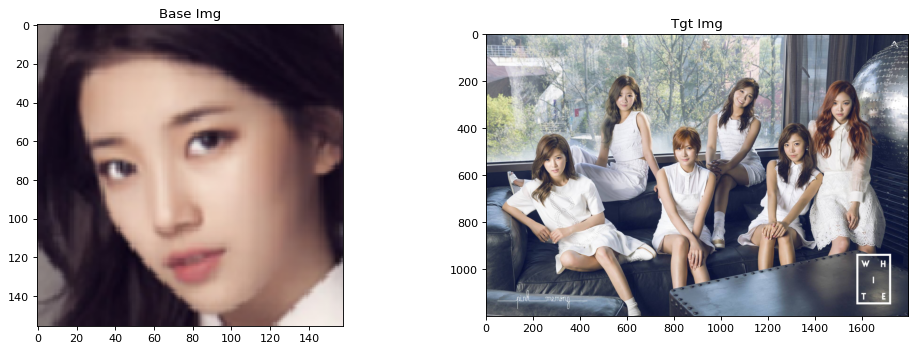

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

img = cv2.imread('./images/practice_img/suji_temp.png')
img2 = cv2.imread('./images/apink.jpg')

figure(figsize=(15, 5), dpi=80)

plt.subplot(121), plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)), plt.title('Base Img')
plt.subplot(122), plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)), plt.title('Tgt Img')
plt.show()

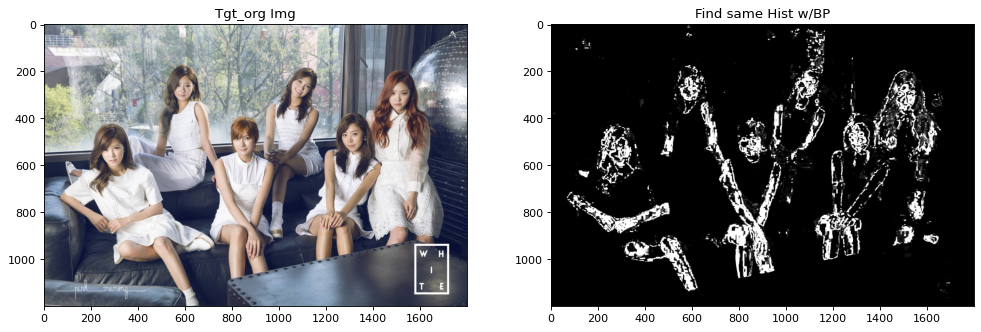

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

cv_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
cv_hsv2 = cv2.cvtColor(img2,cv2.COLOR_BGR2HSV)

cv_hs_hist = cv2.calcHist([cv_hsv], [0,1], None, [180,256], [0,180,0, 256])
cv2.normalize(cv_hs_hist,cv_hs_hist,0,255,cv2.NORM_MINMAX)
cv_dst=cv2.calcBackProject([cv_hsv2],[0,1], cv_hs_hist,[0,180,0,256],1) 
disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))   # smoothing mask
cv2.filter2D(cv_dst,-1,disc,cv_dst)    # smoothing

figure(figsize=(15, 5), dpi=80)

plt.subplot(121),plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)), plt.title('Tgt_org Img')
plt.subplot(122),plt.imshow(cv_dst, cmap='gray'), plt.title('Find same Hist w/BP')
plt.show()

It is possible to restore the color of the detection area.

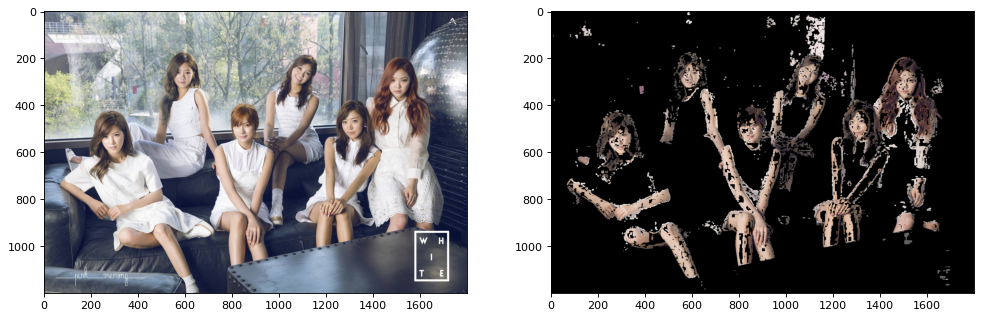

In [7]:
_,thr = cv2.threshold(cv_dst,5,255,0)
thr = cv2.merge((thr,thr,thr))
cv_dst = cv2.bitwise_and(img2,thr)

figure(figsize=(15, 5), dpi=80)

plt.subplot(121), plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
plt.subplot(122), plt.imshow(cv2.cvtColor(cv_dst,cv2.COLOR_BGR2RGB))
plt.show()

## ▶ Fourier Transform

Fourier Transform is used to __analyze the frequency characteristics__ of various filters.   
Frequency refers to the number of times a wave oscillates over time.
At this time, the wave can be expressed as a trigonometric function of Sin and cos, and analysis is possible from the perspective of frequency.  

        푸리에 변환은 다양한 필터의 주파수 특성을 분석하는데 사용됩니다.     
        주파수는 시간의 흐름에 따른 진동하는 파동의 횟수를 의미합니다.   
        이때 파동은 Sin, cos의 삼각함수로 표현할 수 있으며 주파수의 관점에서 분석이 가능해집니다.

- Fourier transform converts the change in brightness into frequency.  
        푸리에 변환은 밝기의 변화를 주파수로 변환하는 것 입니다.
- For images, __2D Discrete Fourier Transform (DFT)__ is used to __find the frequency domain.__ 
>- DFT is the Fourier transform of an image.  
        영상을 푸리에 변환시키는 것을 DFT
- A fast algorithm called __Fast Fourier Transform (FFT)__ is used for __calculation of DFT.__

So how can Fourier transform be applied to an image?
Images can also be converted into waves.
High frequency is used in places where there is a lot of brightness conversion with surrounding pixels.
Areas with little conversion can be expressed at low frequencies.  

        그럼 이미지에 푸리에 변환이 어떻게 적용하는가?   
        이미지도 파동으로 변환을 할 수가 있는데,   
        주변 픽셀과의 밝기 변환가 많은 곳은 고주파로,   
        변환이 적은 곳은 저주파로 표현이 가능합니다.

In other words, __the meaning of high frequency in an image means a boundary line,__
__Low frequencies refer to the background.__  

Therefore, if you remove the high frequencies, the boundary line disappears.
If you remove the low frequencies, only the border remains.

You can go through the image -> Fourier transform -> remove high or low frequencies -> image transform again, leaving only the border or background.
        
        즉, 이미지에서 고주파의 의미는 경계선을 의미하고,   
        저주파는 배경을 의미합니다.   
        그러므로 고주파를 제거하면 경계선이 사라지고,   
        저주파를 제거하면 경계선만 남게 됩니다.
        이미지 -> 푸리에 변환 -> 고주파 또는 저주파 제거 -> 다시 이미지 변환 과정을 거쳐 경계 또는 배경만 남게 할 수 있습니다.
        
- np.fft.fftshift is a function that rearranges the frequencies converted to dpf.
        np.fft.fftshift는 dpf로 변환된 주파수를 재배열해주는 함수
- The part with a frequency of 0 is placed in the very center, and as the frequency increases, it is placed at the edge.  
        주파수가 0인 부분을 정 중앙에 위치시키고, 주파수가 커질수록 가장자리에 위치시킵니다.
- In order to create an image that we can view, we put the dft_shifted values into the magnitude function, which calculates a 2-dimensional vector value.   
- Since these values are very large, the log is taken to create an image that can be output.    
        우리가 볼 수 있는 영상으로 만들기 위해서 dft_shift 된 값들을 2차원 백터 값을 계산해주는 magnitude함수에 넣습니다.   
        이 값들은 매우 큰 값들이 나오기 때문에 log를 취해주어 출력할 수 있는 영상으로 만들어 줍니다.  
        
## ● inverse Fourier transform    

- You can convert images into frequencies using the Fourier transform, but you can also convert frequencies into images in the same way. It is called Inverse Fourier Transform.  
        푸리에 변환으로 영상을 주파수로 만들 수 있지만, 같은 방식으로 주파수를 영상으로 만들 수도 있습니다. 그것을 역 푸리에 변환(Inverse Fourier Transform)이라고 합니다.    
- In order to perform the inverse Fourier transform,   
>- the rearranged frequencies must be rearranged back to their original arrangement.  
>- So, convert the fftshifted dft_shift by putting it back into fftshift.
>- Input the converted frequency back into the dft function.   
>- However, this time, flags inputs DFT_INVERSE, which creates an image with the inverse frequency.
>- Lastly, the INVERSE values are entered into the magnitude function and converted to an image.   

        역 푸리에 변환을 하기 위해서는 재배열된 주파수를 다시 원래 배열로 재배열해야 합니다.   
        그래서 fftshift 된 dft_shift를 다시 fftshift에 넣어 변환해 줍니다.
        이렇게 변환된 주파수를 다시 dft함수에 넣어줍니다.   
        하지만 이번에 flags는 주파수를 역으로 영상으로 만들어주는 DFT_INVERSE를 입력해 줍니다.
        마지막으로 INVERSE된 값들을 magnitude 함수에 넣어서 영상으로 변환해 줍니다.          

## ● Fourier Transform in Numpy  

First we will see how to find Fourier Transform using Numpy.   
Numpy has an FFT package to do this.   
- **np.fft.fft2()** provides us the frequency transform which will be a complex array.   
- Its first argument is the __input image, which is grayscale.__   
- Second argument is optional which decides __the size of output array.__   
- If it is greater than size of input image, input image is padded with zeros before calculation of FFT.   
- If it is less than input image, input image will be cropped.   
- If no arguments passed, Output array size will be same as input.

Now once you got the result, zero frequency component (DC component) will be at top left corner.   
If you want to bring it to center, you need to shift the result by N2 in both the directions.   
- This is simply done by the function, np.fft.fftshift(). (It is more easier to analyze).   
- Once you found the frequency transform, you can find the magnitude spectrum.

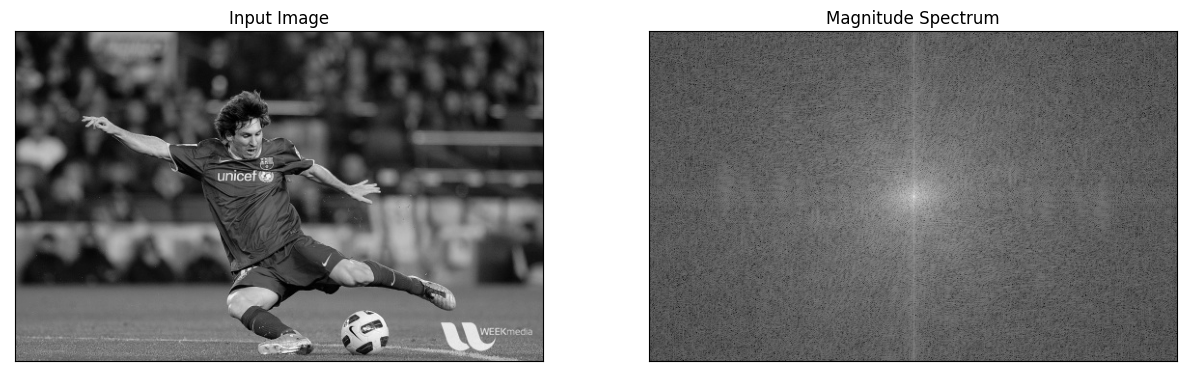

In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(15, 10), dpi=100)

img = cv.imread('./images/messi5.jpg', cv.IMREAD_GRAYSCALE)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift)) 

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

If you look at the image converted to frequency, you can see that the center is bright.   
This means that the image has a lot of low frequencies, and the brightness does not change rapidly.

주파수로 변환된 영상을 보시면 가운데가 밝은 것을 보실 수 있습니다.   
이는 영상이 저주파가 많다는 뜻이며, 밝기의 변화가 급격하게 일어나지 않는다는 뜻입니다.

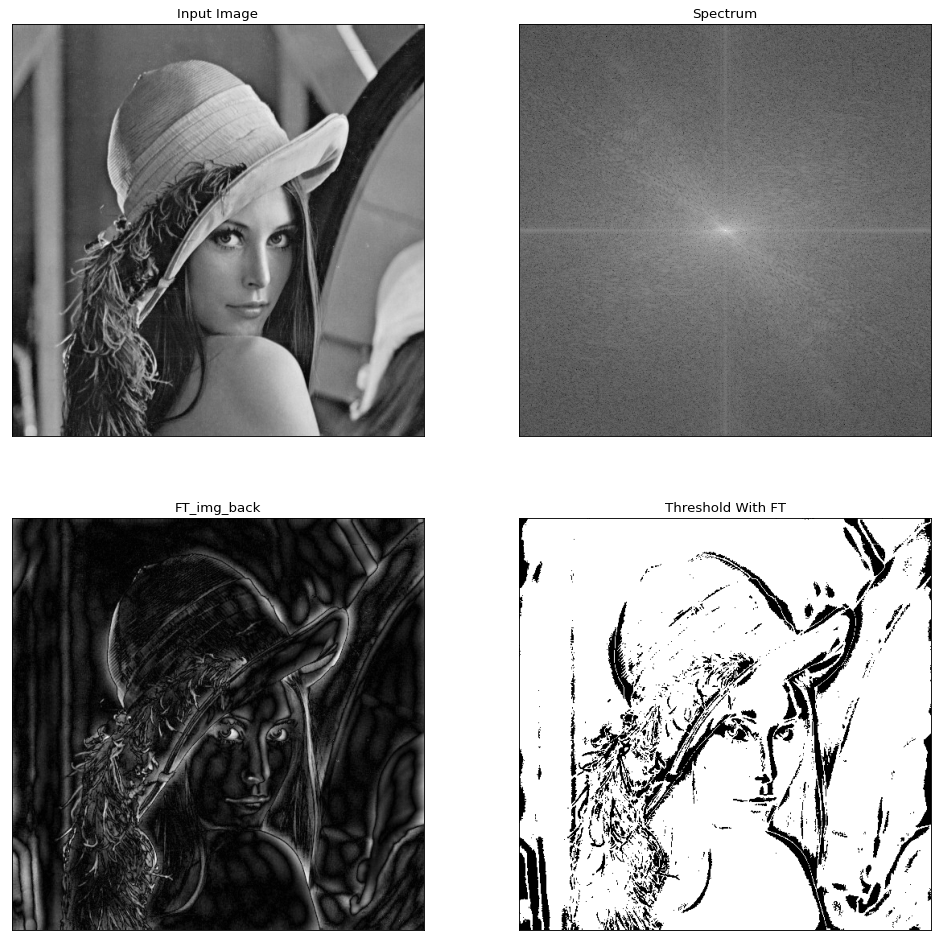

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./images/lena.jpg')
b,g,r = cv2.split(img)
img = cv2.merge([r,g,b])
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
"""
# Apply Fourier Transform.
  When applied, 0,0, that is, the upper left point of the screen is the center, and low frequencies are concentrated there.
  To facilitate analysis, 0,0 is moved to the center of the image and converted to a result that is easy to analyze through log scaling.
  
# Fourier Transform을 적용.
 적용을 하면 0,0, 즉 화면 좌측상단점이 중심이고, 거기에 저주파가 모여 있음.
 분석을 용이하게 하기 위해 0,0을 이미지의 중심으로 이동 시키고 Log Scaling을 하여 분석이 용이한 결과값으로 변환
"""
f = np.fft.fft2(img)          # Fourier Transform
fshift = np.fft.fftshift(f)   # 0,0 is moved to the center of the image.
magnitude_spectrum = 20*np.log(np.abs(fshift)) # log scaling

rows, cols = img.shape
crow, ccol = rows//2, cols//2   # the center of the image

# Set the value of the 10X10 square in the center to 1. Remove all low frequencies in the center
# Because the low frequencies have been removed, the background disappears and only the border remains.

# 중앙에서 10X10 사이즈의 사각형의 값을 1로 설정함. 중앙의 저주파를 모두 제거
# 저주파를 제거하였기 때문에 배경이 사라지고 경계선만 남게 됨.

d = 10
fshift[crow-d:crow+d+1, ccol-d:ccol+d+1] = 1

# Convert the Fourier transform result back to an image 푸리에 변환결과를 다시 이미지로 변환
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

img_new = np.uint8(img_back);  # Convert float type to int type
ret, thresh = cv2.threshold(img_new,30,255,cv2.THRESH_BINARY_INV)


from matplotlib import pyplot as plt
figure(figsize=(15, 15), dpi=80)  

plt.subplot(221),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

plt.subplot(222),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Spectrum'), plt.xticks([]), plt.yticks([])

plt.subplot(223),plt.imshow(img_back, cmap = 'gray')
plt.title('FT_img_back'), plt.xticks([]), plt.yticks([])

plt.subplot(224),plt.imshow(thresh, cmap = 'gray')
plt.title('Threshold With FT'), plt.xticks([]), plt.yticks([])
plt.show()

## ● Fourier Transform in OpenCV  

OpenCV provides the functions **cv.dft()** and **cv.idft()** for this.   
It returns the same result as previous, but with two channels.   
- First channel will have the real part of the result and   
- second channel will have the imaginary part of the result.   
The input image should be converted to np.float32 first.

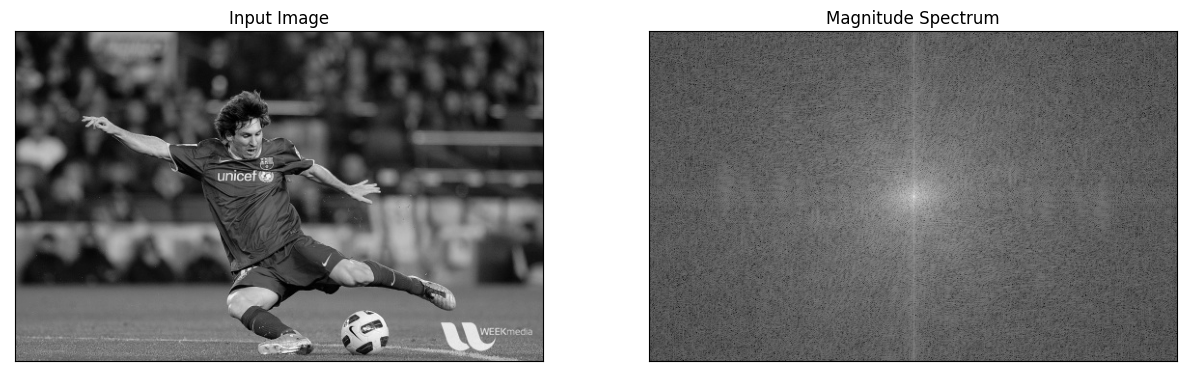

In [13]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(15, 10), dpi=100)
img = cv.imread('./images/messi5.jpg', cv.IMREAD_GRAYSCALE)
dft = cv.dft(np.float32(img),flags = cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

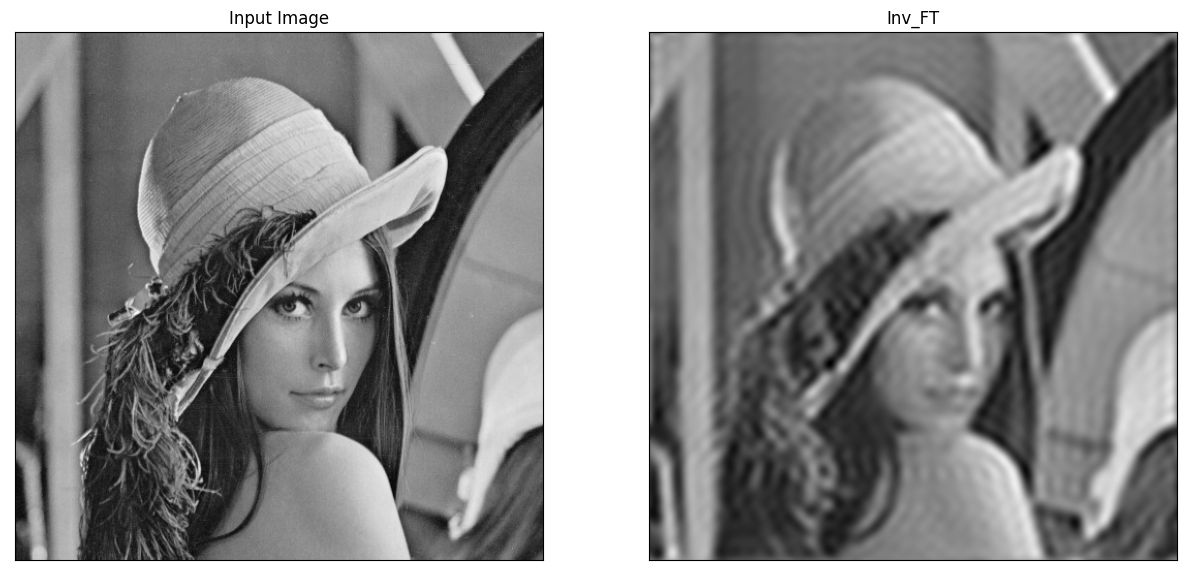

In [19]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('./images/lena.jpg',0)
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
rows, cols = img.shape
crow,ccol = rows//2 , cols//2

# Below is a form of creating a square of size d and then removing the outside of the square (i.e. removing the high frequency area).
# The smaller the d value, the smaller the square, and the outer area, that is, the high frequency area, is removed, so the image becomes blurry.
# The larger the d value, the larger the square and the closer it is to the original image because less of the outer area, that is, the high-frequency area, is removed.

# 아래는 d 크기 사각형을 생성한 후, 사각형 바깥쪽을 제거하는 형태임 (즉, 고주파영역 제거).
# d값이 작을수록 사각형이 작고, 바깥영역 즉, 고주파영역이  많이 제거되기 때문에 이미지가 뭉게지고
# d값이 클수록 사각형이 크고, 바깥영역 즉, 고주파 영역이 적게 제거되기 때문에 원래 이미지와 가까워짐.

d = 30
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-d:crow+d+1, ccol-d:ccol+d+1] = 1

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

figure(figsize=(15, 10), dpi=100)
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Inv_FT'), plt.xticks([]), plt.yticks([])
plt.show()

## ▶ LPF(Low-frequency filter) / HPF(high-frequency filter) using Fourier transform  
    푸리에 변환을 이용한 저주파 필터(LPF) / 고주파 필터(HPF)  

A **large change in brightness** value is called **high frequency**, and a **small change in brightness value is called low frequency.**
When oepnCV displays an image as a collection of low and high frequencies, __passing only high frequencies based on a certain frequency is called a High Pass Filter__,  
and __passing only low frequencies is called a Low Pass Filter.__    

    밝기의 값이 크게 변경되는것을 고주파, 작게 변경되는것을 저주파라고 했습니다.
    이렇게 oepnCV에서 저주파와 고주파의 모음으로 영상을 나타낼 때,   
    어떤 주파수를 기준으로 고주파만 통과시키는 것을  High Pass Filter,   
    저주파만 통과시키는 것을 Low Pass Filter라고 합니다.

C:\Users\Owner\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log
C:\Users\Owner\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log


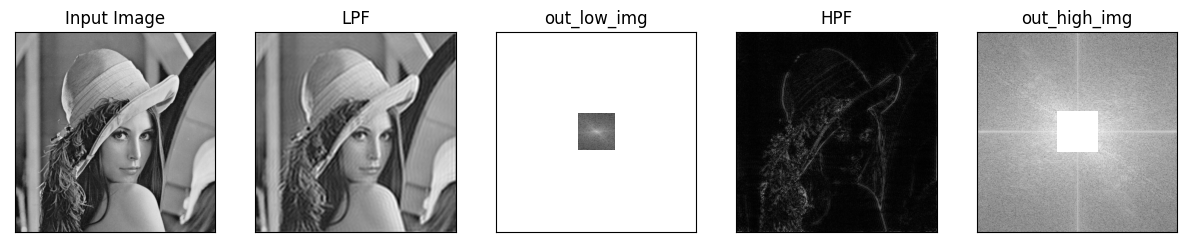

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

img = cv2.imread('./images/lena.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
height, width = gray.shape
dft = cv2.dft(np.float32(gray), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
row, col = int(height / 2), int(width / 2)

# LPF
LPF = np.zeros((height, width, 2), np.uint8)
LPF[row - 50:row + 50, col - 50:col + 50] = 1
LPF_shift = dft_shift * LPF
LPF_ishift = np.fft.ifftshift(LPF_shift)
LPF_img = cv2.idft(LPF_ishift)
LPF_img = cv2.magnitude(LPF_img[:, :, 0], LPF_img[:, :, 1])
out_low = 20*np.log(cv2.magnitude(LPF_shift[:, :, 0], LPF_shift[:, :, 1]))  

# HPF
HPF = np.ones((height, width, 2), np.uint8)
HPF[row - 50:row + 50, col - 50:col + 50] = 0
HPF_shift = dft_shift * HPF
HPF_ishift = np.fft.ifftshift(HPF_shift)
HPF_img = cv2.idft(HPF_ishift)
HPF_img = cv2.magnitude(HPF_img[:, :, 0], HPF_img[:, :, 1])
out_high = 20*np.log(cv2.magnitude(HPF_shift[:, :, 0], HPF_shift[:, :, 1]))  

figure(figsize=(15, 10), dpi=100)

plt.subplot(151), plt.imshow(gray, cmap='gray'),plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(152), plt.imshow(LPF_img, cmap='gray'),plt.title('LPF'), plt.xticks([]), plt.yticks([])
plt.subplot(153), plt.imshow(out_low, cmap='gray'),plt.title('out_low_img'), plt.xticks([]), plt.yticks([])
plt.subplot(154), plt.imshow(HPF_img, cmap='gray'),plt.title('HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(155), plt.imshow(out_high, cmap='gray'),plt.title('out_high_img'), plt.xticks([]), plt.yticks([])

plt.show()

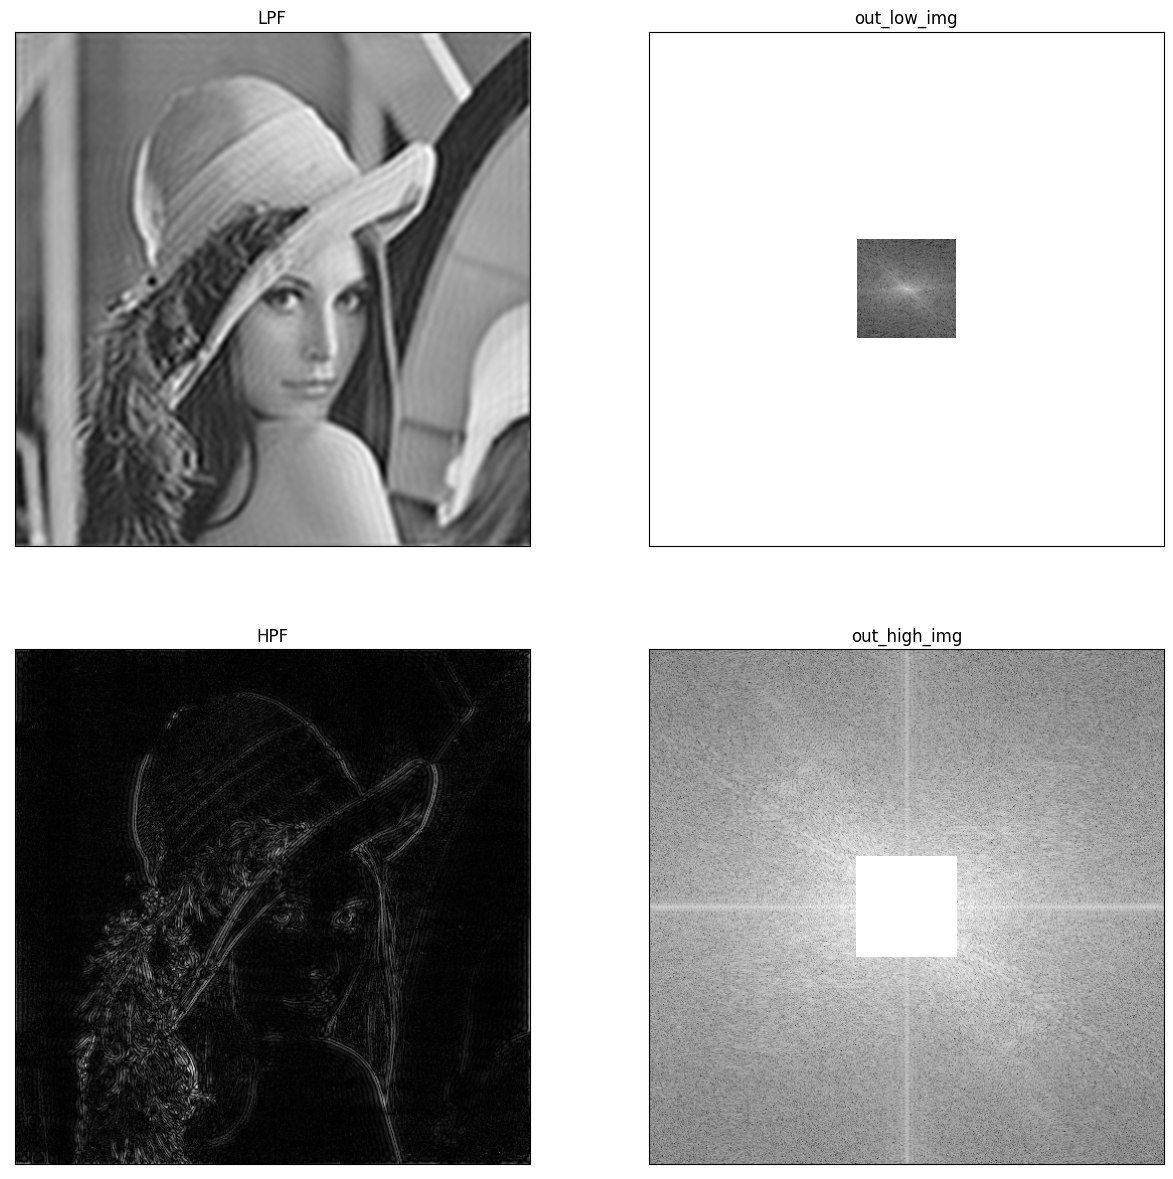

In [5]:
figure(figsize=(15, 15), dpi=100)

plt.subplot(221), plt.imshow(LPF_img, cmap='gray'),plt.title('LPF'), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(out_low, cmap='gray'),plt.title('out_low_img'), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(HPF_img, cmap='gray'),plt.title('HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(out_high, cmap='gray'),plt.title('out_high_img'), plt.xticks([]), plt.yticks([])

plt.show()

You can see that the __LPF is almost similar to the original video, but slightly blurred,__   
while the HPF shows only the edges of the original video.
- most of the image has a lot of __low frequencies.__   
>- So, you can see that the image that passed LPF is almost similar to the original,   
>- while the HPF is far from the original.